# K均值算法（K-means）聚类

## 【关键词】K个种子，均值

## 一、K-means算法原理

### 聚类的概念：一种无监督的学习，事先不知道类别，自动将相似的对象归到同一个簇中。

K-Means算法是一种聚类分析（cluster analysis）的算法，其主要是来计算数据聚集的算法，主要通过不断地取离种子点最近均值的算法。

K-Means算法主要解决的问题如下图所示。我们可以看到，在图的左边有一些点，我们用肉眼可以看出来有四个点群，但是我们怎么通过计算机程序找出这几个点群来呢？于是就出现了我们的K-Means算法

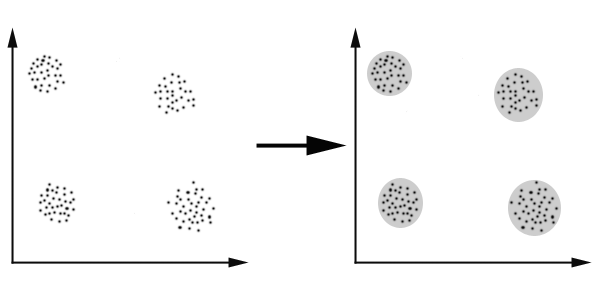

这个算法其实很简单，如下图所示：

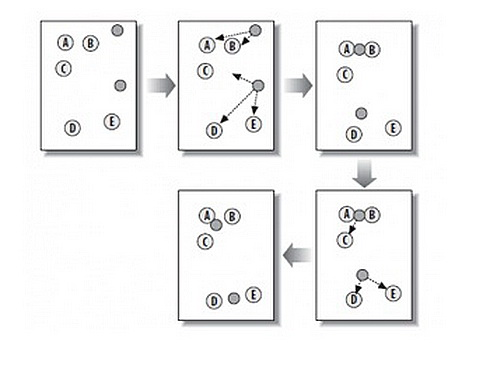

从上图中，我们可以看到，A，B，C，D，E是五个在图中点。而灰色的点是我们的种子点，也就是我们用来找点群的点。有两个种子点，所以K=2。

然后，K-Means的算法如下：

1. 随机在图中取K（这里K=2）个种子点。
2. 然后对图中的所有点求到这K个种子点的距离，假如点Pi离种子点Si最近，那么Pi属于Si点群。（上图中，我们可以看到A，B属于上面的种子点，C，D，E属于下面中部的种子点）
3. 接下来，我们要移动种子点到属于他的“点群”的中心。（见图上的第三步）
4. 然后重复第2）和第3）步，直到，种子点没有移动（我们可以看到图中的第四步上面的种子点聚合了A，B，C，下面的种子点聚合了D，E）。

这个算法很简单，重点说一下“求点群中心的算法”：欧氏距离（Euclidean Distance）：差的平方和的平方根

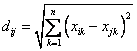


### K-Means主要最重大的缺陷——都和初始值有关：

K是事先给定的，这个K值的选定是非常难以估计的。很多时候，事先并不知道给定的数据集应该分成多少个类别才最合适。（ISODATA算法通过类的自动合并和分裂，得到较为合理的类型数目K）

K-Means算法需要用初始随机种子点来搞，这个随机种子点太重要，不同的随机种子点会有得到完全不同的结果。（K-Means++算法可以用来解决这个问题，其可以有效地选择初始点）

### 总结：K-Means算法步骤：

1. 从数据中选择k个对象作为初始聚类中心;
2. 计算每个聚类对象到聚类中心的距离来划分；
3. 再次计算每个聚类中心
4. 计算标准测度函数，直到达到最大迭代次数，则停止，否则，继续操作。
5. 确定最优的聚类中心

### K-Means算法应用

看到这里，你会说，K-Means算法看来很简单，而且好像就是在玩坐标点，没什么真实用处。而且，这个算法缺陷很多，还不如人工呢。是的，前面的例子只是玩二维坐标点，的确没什么意思。但是你想一下下面的几个问题：

1）如果不是二维的，是多维的，如5维的，那么，就只能用计算机来计算了。

2）二维坐标点的X，Y 坐标，其实是一种向量，是一种数学抽象。现实世界中很多属性是可以抽象成向量的，比如，我们的年龄，我们的喜好，我们的商品，等等，能抽象成向量的目的就是可以让计算机知道某两个属性间的距离。如：我们认为，18岁的人离24岁的人的距离要比离12岁的距离要近，鞋子这个商品离衣服这个商品的距离要比电脑要近，等等。

## 二、实战

重要参数：
- n_clusters：聚类的个数

重要属性：
- cluster_centers_ : [n_clusters, n_features]的数组，表示聚类中心点的坐标
- labels_ : 每个样本点的标签


### 1、聚类实例

导包，使用make_blobs生成随机点cluster_std

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

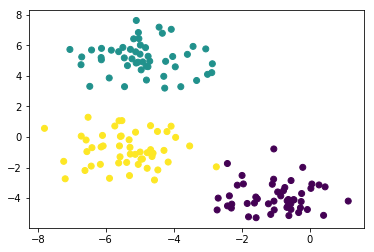

In [11]:
train,target = make_blobs(n_samples=150,n_features=2,centers=3)
plt.scatter(train[:,0],train[:,1],c=target)

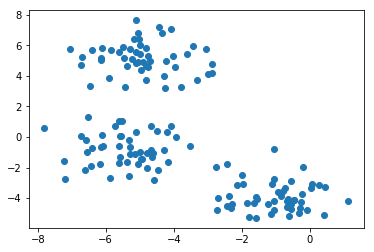

In [13]:
plt.scatter(train[:,0],train[:,1])

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmean = KMeans(n_clusters=3)

In [18]:
kmean.fit(train)
y_ = kmean.predict(train)

In [19]:
# 无监督学习可以直接fit_predict
y_ = kmean.fit_predict(train)

建立模型,训练数据，并进行数据预测，使用相同数据

绘制图形，显示聚类结果kmeans.cluster_centers

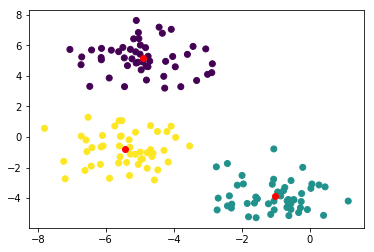

In [22]:
plt.scatter(train[:,0],train[:,1],c=y_)

# 获取聚类中心
centers = kmean.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red')

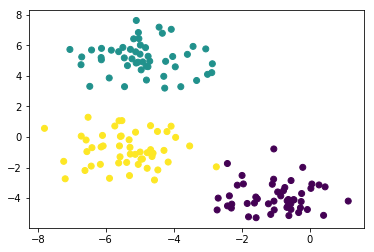

In [29]:
plt.scatter(train[:,0],train[:,1],c=target)

In [25]:
(kmean.labels_ == target).sum()/target.size

0.32666666666666666

### 实战，三问中国足球几多愁？

导包，3D图像需导包：from mpl_toolkits.mplot3d import Axes3D  
读取数据AsiaZoo.txt

In [56]:
zoo = pd.read_csv('../data/AsiaZoo.txt',header=None)

In [57]:
train = zoo[[1,2,3]]

In [58]:
train

,1,2,3
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2
5,50,50,1
6,50,40,9
7,50,40,9
8,40,40,5
9,50,50,9


In [39]:
county = zoo[0]

In [40]:
county

0         中国
1         日本
2         韩国
3         伊朗
4         沙特
5        伊拉克
6        卡塔尔
7        阿联酋
8     乌兹别克斯坦
9         泰国
10        越南
11        阿曼
12        巴林
13        朝鲜
14        印尼
Name: 0, dtype: object

In [75]:
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(train)

In [37]:
y_

array([2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2])

In [41]:
county[y_ == 0]

3         伊朗
4         沙特
8     乌兹别克斯坦
12        巴林
13        朝鲜
Name: 0, dtype: object

In [42]:
county[y_==1]

1    日本
2    韩国
Name: 0, dtype: object

In [43]:
county[y_==2]

0      中国
5     伊拉克
6     卡塔尔
7     阿联酋
9      泰国
10     越南
11     阿曼
14     印尼
Name: 0, dtype: object

In [76]:
for i in range(3):
    items = county[y_==i]
    for item in items:
        print(item,end=' ')
    print('\n')

日本 韩国 

伊朗 沙特 乌兹别克斯坦 巴林 朝鲜 

中国 伊拉克 卡塔尔 阿联酋 泰国 越南 阿曼 印尼 



列名修改为："国家","2006世界杯","2010世界杯","2007亚洲杯"

使用K-Means进行数据处理，对亚洲球队进行分组，分三组

for循环打印输出分组后的球队，每一组球队打印一行

绘制三维立体图形

- ax = plt.subplot(projection  = '3d')  
- ax.scatter3D()

In [45]:
from mpl_toolkits.mplot3d import Axes3D

In [65]:
train.columns = ['2006-world-cup','2010-word-cup','2007-aisa-cup']

In [66]:
train

,2006-world-cup,2010-word-cup,2007-aisa-cup
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2
5,50,50,1
6,50,40,9
7,50,40,9
8,40,40,5
9,50,50,9


Text(0.5,0,'2007-aisa-cup')

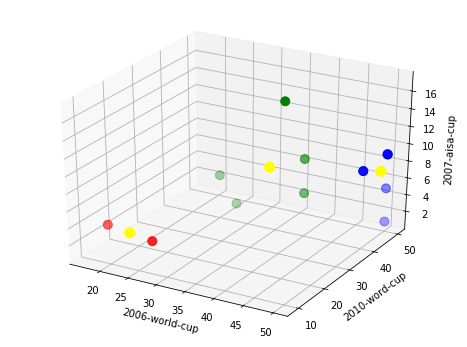

In [79]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r','g','b'])
plt.figure(figsize=(8,6))
ax = plt.subplot(projection='3d')
ax.scatter3D(train['2006-world-cup'],train['2010-word-cup'],train['2007-aisa-cup'],c=y_,cmap=cmap,s=80)

clusters = kmean.cluster_centers_
ax.scatter3D(clusters[:,0],clusters[:,1],clusters[:,2],c='yellow',s=100,alpha=1)

ax.set_xlabel('2006-world-cup')
ax.set_ylabel('2010-word-cup')
ax.set_zlabel('2007-aisa-cup')

In [74]:
clusters

array([[34.6, 38.4,  7.6],
       [22.5, 12. ,  3.5],
       [50. , 47.5,  7.5]])

绘制聚类点

### 2、聚类实践与常见错误

导包，使用make_blobs创建样本点

第一种错误，k值不合适，make_blobs默认中心点三个

In [80]:
train,target = make_blobs(n_samples=150,n_features=2,centers=3)

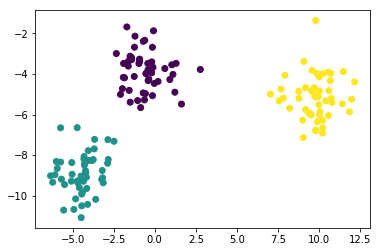

In [81]:
plt.scatter(train[:,0],train[:,1],c=target)

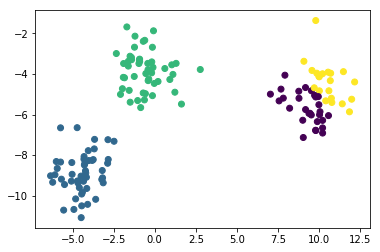

In [82]:
kmean = KMeans(n_clusters=4)
y_ = kmean.fit_predict(train)
plt.scatter(train[:,0],train[:,1],c=y_)

第二种错误,数据偏差  
trans = [[0.6,-0.6],[-0.4,0.8]]  
X2 = np.dot(X,trans)

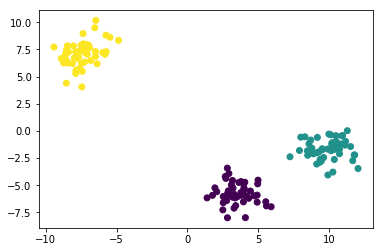

In [97]:
train,target = make_blobs(n_samples=150,n_features=2,centers=3)
plt.scatter(train[:,0],train[:,1],c=target)

In [98]:
trans = [[0.6,-0.6],[-0.4,0.8]] 
train1 = np.dot(train,trans)
# plt.scatter(train1[:,0],train1[:,1],c=target)

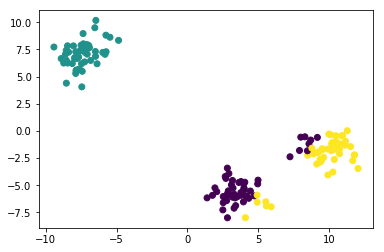

In [99]:
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(train1)
plt.scatter(train[:,0],train[:,1],c=y_)

第三个错误:标准偏差不相同cluster_std

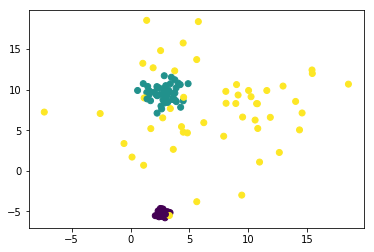

In [101]:
train,target = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=[0.3,1,5])
plt.scatter(train[:,0],train[:,1],c=target)

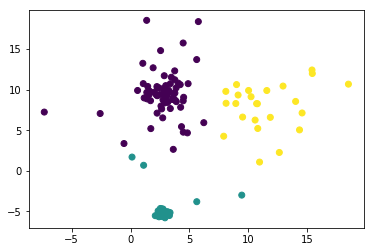

In [104]:
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(train)
plt.scatter(train[:,0],train[:,1],c=y_)

第四个错误：样本数量不同

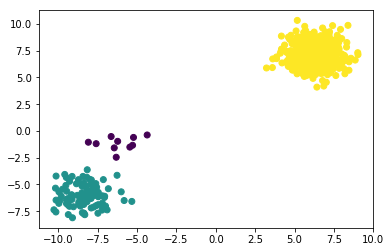

In [122]:
train,target = make_blobs(n_samples=1500,n_features=2,centers=3)

train1 = train[target==0][:10]
train2 = train[target==1][:100]
train3 = train[target==2][:500]

X_train = np.concatenate((train1,train2,train3))
y_train = [0]*10 + [1]*100 + [2]*500
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

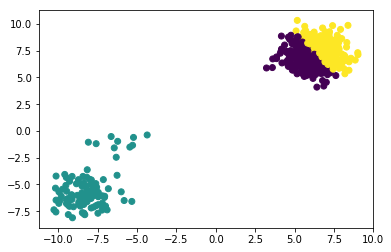

In [123]:
kmean = KMeans(n_clusters=3)
y_ = kmean.fit_predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1],c=y_)

## 三、作业

### 1、分析ex7data2.mat文件

找出最佳聚类数目，并画出聚类的中心点

`
from scipy.io import loadmat
from sklearn.cluster import KMeans
data = loadmat('../data/ex7data2.mat')
X = data['X']
X.shape
`

### 2、图片压缩

使用聚类压缩图片

`
img = plt.imread('../data/bird_small.png')
img_shape = img.shape
img_shape
`

- 核心思想：把图片颜色数据聚类分析成N个类别，用中心点颜色替换其他颜色

In [125]:
a = np.array([1,2,3])
b = [0,1,0,1]
a[b]

array([1, 2, 1, 2])